In [331]:
ls ..\.,

 Volume in drive C is OS
 Volume Serial Number is 7617-1169

 Directory of C:\Users\Jigar\Dropbox\Ebooks\ResearchComputing-Meetup-Fall-2013-fdf08fb

18-09-2016  19:55    <DIR>          .
18-09-2016  19:55    <DIR>          ..
30-01-2014  08:43               112 .gitignore
19-09-2016  17:03    <DIR>          python
30-01-2014  08:43             6,232 README.md
08-04-2016  20:36           163,604 Z calibration.xlsx
               3 File(s)        169,948 bytes
               3 Dir(s)  107,029,295,104 bytes free


In [203]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

In [204]:
data = pd.read_excel('../../../MLE_ZCAL.xlsx',header=None,names = ['z','wx','wy'])
data.index=data['z']
del data['z']
data.head()

,wx,wy
z,,
318.89542,1.42084,3.13009
-349.10458,3.13268,1.41272
320.89542,1.44200,3.15268
-15.10458,1.82528,1.59251
322.89542,1.44200,3.15268


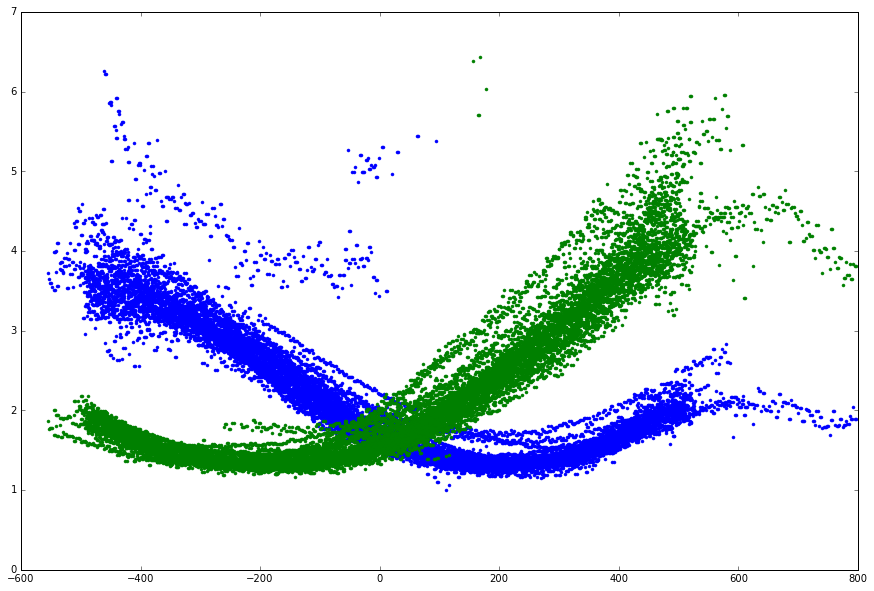

In [205]:

plt.figure(figsize=[15,10])
plt.plot (data.index,data.wx,'.b')
plt.plot (data.index,data.wy,'.g')

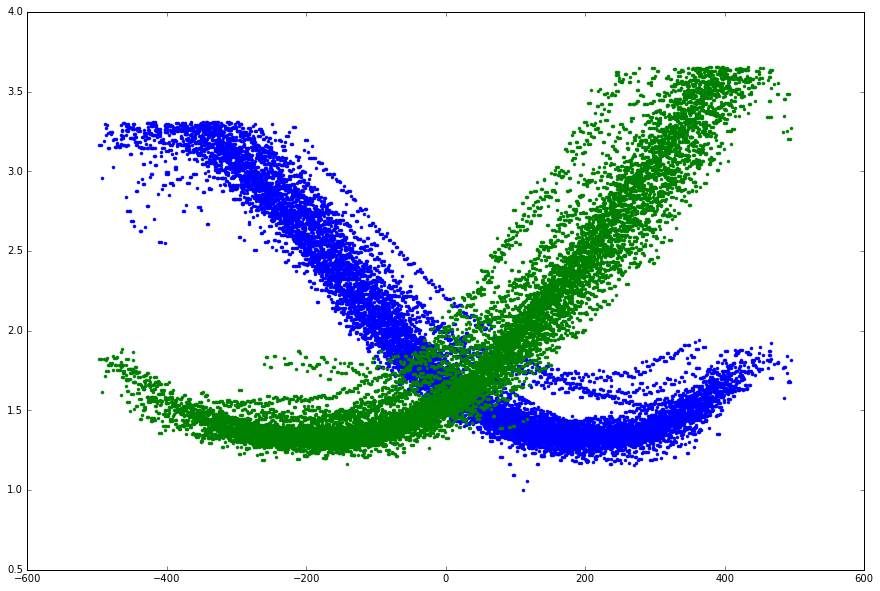

In [207]:

#X1 = data[data.wx < 3.25]
#X1 = X1[X1.wy < 3.25]
#data.wx.mean()+ 2.0*data.wx.std()
from scipy import stats
#X1=data[(np.abs(stats.zscore(data)) < 1.5).all(axis=1)]
X1=X1[(X1.index >-500) & (X1.index<500)]
plt.figure(figsize=[15,10])
plt.plot (X1.index,X1.wx,'.b')
plt.plot (X1.index,X1.wy,'.g')


(14086L,)
(14086L,)
0.130949237635


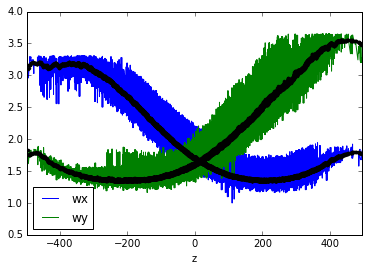

In [303]:
X2= X1.sort_index(ascending=True)
#X2.describe()
X2.plot()
X2.wx.ewm(span=50).mean().plot(style='.k')
X2.wy.ewm(span=50).mean().plot(style='.k')
print (np.shape(X2.wx.ewm(span=20).mean()))
print (np.shape(X2.wx))

X3 = X2.wx - X2.wx.ewm(span=50).mean()
print(np.std(X3))


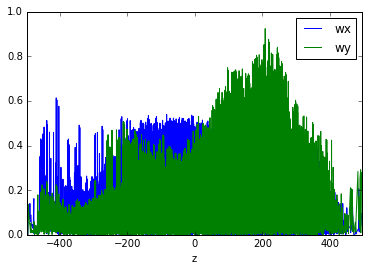

In [304]:
#X2.ewm(span=50).mean().plot(style='.k')
dat3 =np.abs(X2-X2.ewm(span=50).mean())
dat3.plot()

(14086, 2)
(14086, 2)


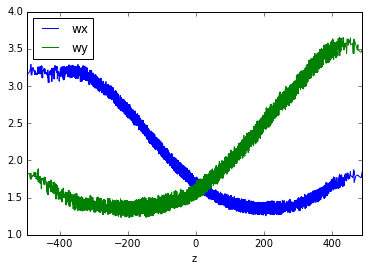

In [349]:
dat4 = X2[dat3<np.std(dat3)]
print(np.shape(dat4))
dat5 = dat4.dropna(axis=0,how='any')
print(np.shape(dat4))
dat5.plot()
dat5.head()
data = dat5

(305, 2)

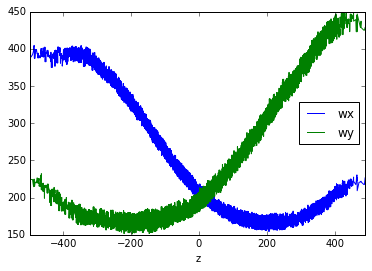

In [350]:
X = data[['wx','wy']]*123
y =data.index
X.plot()    

#CREATING TRAINING AND TEST DATASET
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)
np.shape(X_test)

In [351]:
#Linear Regression with only linear terms

regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

print(regr.coef_)
print (regr.intercept_)


pred1 = regr.predict(X_test)
np.shape(pred1)

[-1.56791597  1.42563561]
44.5959013727


(305L,)

r2_score : 0.970278358362
Mean sqd error : 1557.43392001
Explained variance score : 0.970343371049
Regression Score : 0.970683574626


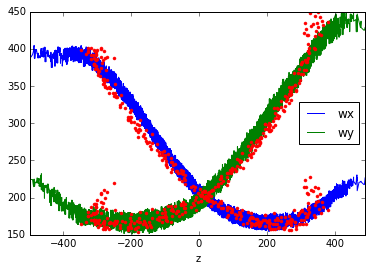

In [352]:
X.plot()
plt.plot(pred1,X_test.wx,'.r')
plt.plot(pred1,X_test.wy,'.r')
print ('r2_score : {}'.format(metrics.r2_score(y_test,pred1)))
print ('Mean sqd error : {}'.format(metrics.mean_squared_error(y_test,pred1)))
print ('Explained variance score : {}'.format(metrics.explained_variance_score(y_test,pred1)))
print ('Regression Score : {}'.format(regr.score(X_train,y_train)))


[  0.00000000e+00  -4.19873897e+00  -4.19190389e+00   1.08372056e-02
   1.73838239e-02   1.05716834e-02   3.26987534e-06  -9.02045850e-05
   4.77808927e-05  -2.15043498e-05]
626.811237063


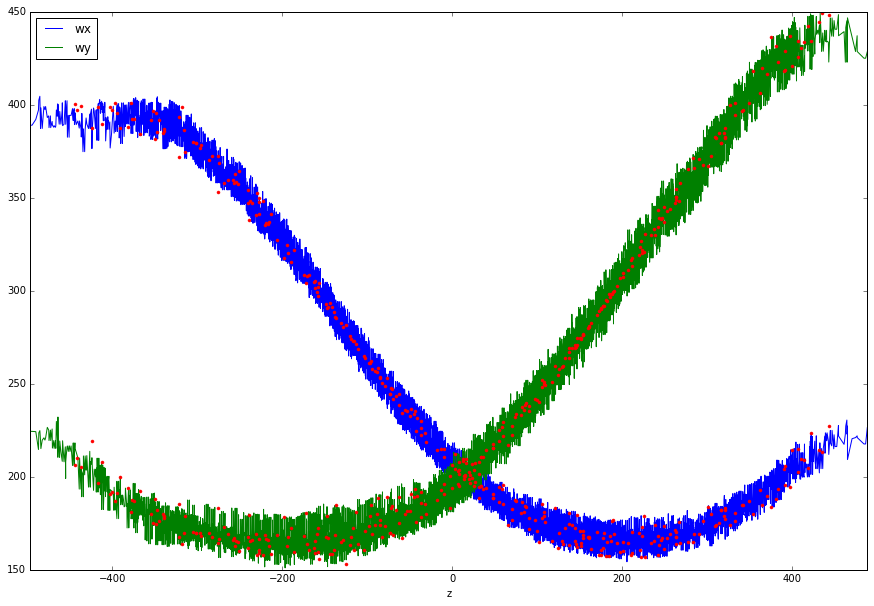

In [353]:
#Polynomial Regression

X_train_1 = PolynomialFeatures(degree=3).fit_transform(X_train)
X_test_1 = PolynomialFeatures(degree=3).fit_transform(X_test)

regr2 = linear_model.LinearRegression()
regr2.fit(X_train_1,y_train)
print(regr2.coef_)
print (regr2.intercept_)

pred2 =regr2.predict(X_test_1)
np.shape(pred2)

#plt.plot (y,X.wx,'.b')
#plt.plot(y,X.wy,'.g')

X.plot(figsize=(15,10))
plt.plot (pred2,X_test.wx,'.r')
plt.plot (pred2,X_test.wy,'.r')

plt.show()

In [354]:
print ('r2_score : {}'.format(metrics.r2_score(y_test,pred2)))
print ('Mean sqd error : {}'.format(metrics.mean_squared_error(y_test,pred2)))
print ('Explained variance score : {}'.format(metrics.explained_variance_score(y_test,pred2)))
print ('Regression Score : {}'.format(regr2.score(X_train_1,y_train)))

r2_score : 0.996151888312
Mean sqd error : 201.643628689
Explained variance score : 0.996154477013
Regression Score : 0.995922793964


11.1593173041
8.78141594478


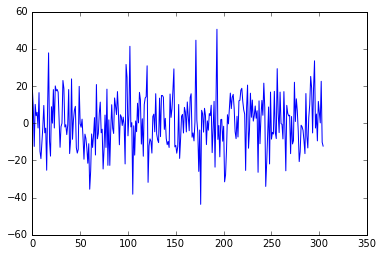

In [355]:
X_mod = PolynomialFeatures(degree=3).fit_transform(X)
j1_pred=regr2.predict(X_mod)
j2_pred = regr2.predict(X_test_1)
plt.plot(j2_pred-y_test)

print (np.mean(np.abs(j2_pred-y_test)))
print (np.std(np.abs(j2_pred-y_test)))

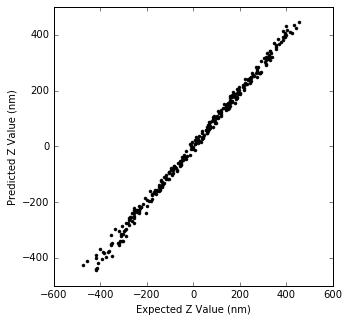

In [356]:
plt.figure(figsize=(5,5))
plt.plot(y_test,j2_pred,'.k')
plt.xlabel('Expected Z Value (nm)')
plt.ylabel('Predicted Z Value (nm)')
plt.show()

In [387]:
#Linear Regression without cross-terms
X = data[['wx','wy']]*123
X_new =X
#X_new['wx^2'],X_new['wy^2']= [(X.wx)**2,(X.wy)**2]
#With cross-term
X_new['wx^2'],X_new['wy^2'],X_new['wxwy'] = [(X.wx)**2,(X.wy)**2,(X.wx)*(X.wy)]
y_new = X_new.index
X_new.head()

,wx,wy,wx^2,wy^2,wxwy
z,,,,,
-496.62891,389.02194,224.42826,151338.069801,50368.043887,87307.517096
-494.62891,389.02194,224.42826,151338.069801,50368.043887,87307.517096
-490.18735,392.14245,224.27574,153775.701092,50299.607553,87948.038159
-487.03860,397.17807,214.65714,157750.419289,46077.687753,85257.108577
-486.62891,402.53472,223.66689,162034.200805,50026.877682,90033.688939


In [388]:
#CREATING TRAINING AND TEST DATASET
X_new_train, X_new_test, y_new_train, y_new_test = train_test_split(X_new, y, test_size=0.05)


regr3 = linear_model.LinearRegression()
regr3.fit(X_new_train,y_new_train)

print ('Coeffcients : {}'.format(regr3.coef_))
print ('Intercept : {}'.format(regr3.intercept_))

Coeffcients : [ 0.6602297  -0.24810984 -0.00288752  0.00445293 -0.00458917]
Intercept : 55.3111528301


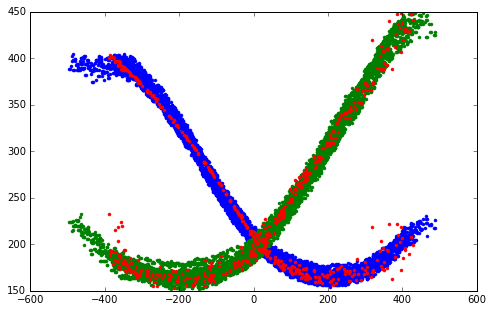

r2_score : 0.98857136573
Mean sqd error : 610.640761748
Explained variance score : 0.9885783098
Regression Score : 0.98923863261


In [397]:
pred_new = regr3.predict(X_new_test)

plt.figure(figsize=(8,5))
plt.plot (y_new,X_new.wx,'.b')
plt.plot (y_new,X_new.wy,'.g')
plt.plot (pred_new,X_new_test['wx'],'.r')
plt.plot (pred_new,X_new_test['wy'],'.r')

plt.show()

print ('r2_score : {}'.format(metrics.r2_score(y_new_test,pred_new)))
print ('Mean sqd error : {}'.format(metrics.mean_squared_error(y_new_test,pred_new)))
print ('Explained variance score : {}'.format(metrics.explained_variance_score(y_new_test,pred_new)))
print ('Regression Score : {}'.format(regr3.score(X_new_train,y_new_train)))

16.8963060916
18.0320714896


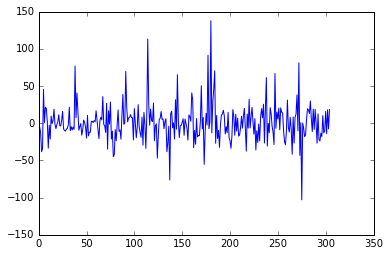

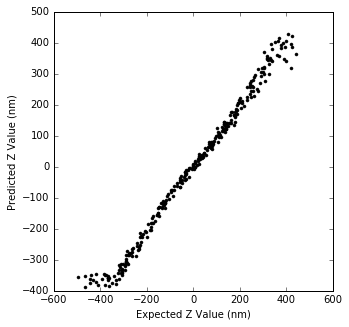

In [401]:
plt.figure()
plt.plot(pred_new-y_new_test)
print (np.mean(np.abs(pred_new-y_new_test)))
print (np.std(np.abs(pred_new-y_new_test)))

plt.figure(figsize=(5,5))
plt.plot(y_new_test,pred_new,'.k')
plt.xlabel('Expected Z Value (nm)')
plt.ylabel('Predicted Z Value (nm)')
plt.show()